<a href="https://colab.research.google.com/github/ZackYovel/GA-for-Hyper-Parameter-Tuning/blob/MLK/GA_queen_ant_with_harmon_and_n_survivors15_and_reduced_small_step_mutation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Genetic Algorithm for Hyper Parameter Tuning

## Using data from the kaggle Housing Prices Competition for Kaggle Learn Users

Using multiple populations.

Competition URL: https://www.kaggle.com/c/home-data-for-ml-course

In [1]:
# Imports
import pandas as pd
import numpy as np
from numpy.random import default_rng
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import concurrent.futures
import random
import json
import os
import heapq
import time
import logging

random_gen = default_rng()

In [2]:
# Data load
project_files_path = os.path.join("drive", "My Drive", "Colab Notebooks", "GA_queen_ant_with_harmon_and_n_survivors15_and_reduced_small_step_mutation")

train = pd.read_csv(os.path.join(project_files_path, "train.csv"))
X_test = pd.read_csv(os.path.join(project_files_path, "test.csv"))

X = train.drop(['SalePrice'], axis=1)
y = train.SalePrice

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
# Preprocess data

numerical_columns = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']

most_frequent_num_imputer = SimpleImputer(strategy='most_frequent')
most_frequent_cat_imputer = SimpleImputer(strategy='most_frequent')

low_cardinality_cols = [col for col in categorical_columns if X_train[col].nunique() < 10]
high_cardinality_cols = set(categorical_columns) - set(low_cardinality_cols)
good_label_cols = [col for col in high_cardinality_cols if set(X_train[col]).issuperset(set(X_cv[col]))]

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

ordinal_encoder = OrdinalEncoder()

numerical_transformer = most_frequent_num_imputer

categorical_low_card_transformer = Pipeline(
    steps=[
           ('impute', most_frequent_cat_imputer),
           ('encode', OH_encoder)
    ]
)

categorical_high_card_transformer = Pipeline(
    steps=[
           ('impute', most_frequent_cat_imputer),
           ('encode', ordinal_encoder)
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
                  ('num', numerical_transformer, numerical_columns),
                  ('cat_low_card', categorical_low_card_transformer, low_cardinality_cols),
                  ('cat_high_card', categorical_high_card_transformer, good_label_cols)
    ]
)


X_train_prepped = preprocessor.fit_transform(X_train)
X_cv_prepped = preprocessor.transform(X_cv)
X_test_prepped = preprocessor.transform(X_test)

In [4]:
def model_from_hp(hp):
  return RandomForestRegressor(n_estimators=hp['n_estimators'],
                               criterion='mae',
                               max_depth=hp['max_depth'],
                               min_samples_split=hp['min_samples_split'],
                               min_samples_leaf=hp['min_samples_leaf'],
                               min_weight_fraction_leaf=hp['min_weight_fraction_leaf'],
                               max_features=hp['max_features'],
                               max_leaf_nodes=hp['max_leaf_nodes'],
                               min_impurity_decrease=hp['min_impurity_decrease'],
                               bootstrap=hp['bootstrap'],
                               oob_score=hp['oob_score'],
                               n_jobs=-1,
                               ccp_alpha=hp['ccp_alpha'],
                               max_samples=hp['max_samples'])

## Queen Ant With Harem and n_survivors=15 and reduced small step mutation

Queen Ant: single population (`n_territories=1, pop_size=150, n_survivors=15`),
the best individual is a parent of every ofspring.

Harmon: the best individual is paired with every other survivor in a loop until population is full (requires the number of offsprings which is
`pop_size - n_survivors` to be >= n_survivors - 1 in order to guarantee all survivors parent offsprings.

Also reduced small step mutation to  0.01

**************************************************************************************************** 
Generation 0/500
......................................................................................................................................................
Best MAE for teritory 0 is 29053.549525816645 . Average improvement is 0
This generation took 0:12:15 to process.
Remaining 499 generations and approximately 50:56:46
Average improvement for generation: 0.0 . Average total improvement: 0.0
Total runtime: 0:12:15


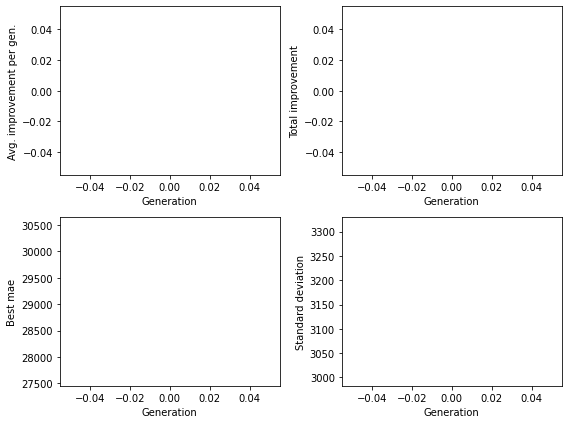

**************************************************************************************************** 
Generation 1/500
......................................................................................................................................................
Best MAE for teritory 0 is 28477.033205557287 . Average improvement is 0.07990813648964967
This generation took 0:11:20 to process.
Remaining 498 generations and approximately 72:29:09
Average improvement for generation: 0.07990813648964967 . Average total improvement: 0.07990813648964967
Total runtime: 0:23:35


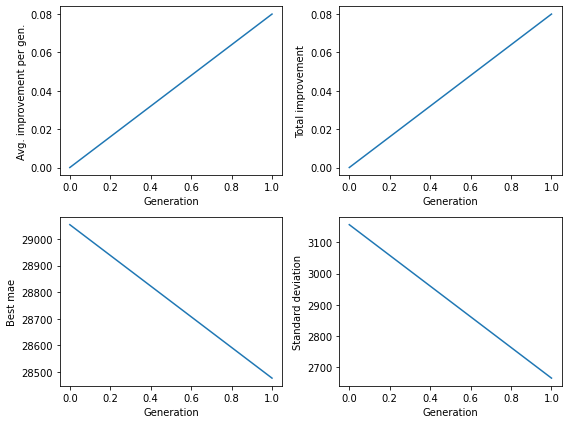

**************************************************************************************************** 
Generation 2/500
......................................................................................................................................................
Best MAE for teritory 0 is 23018.606991025033 . Average improvement is 0.06511042677561063
This generation took 0:14:08 to process.
Remaining 497 generations and approximately 94:46:18
Average improvement for generation: 0.06511042677561063 . Average total improvement: 0.1450185632652603
Total runtime: 0:37:44


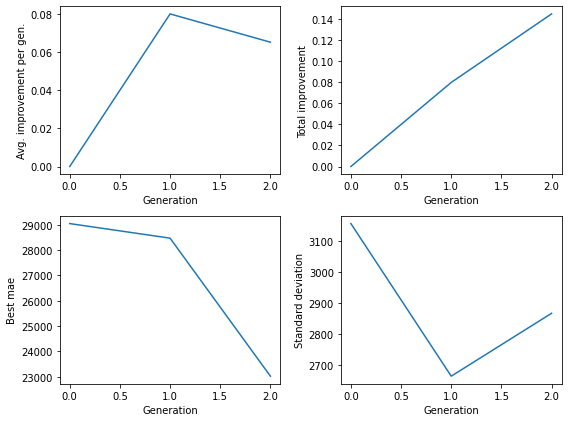

**************************************************************************************************** 
Generation 3/500
......................................................................................................................................................
Best MAE for teritory 0 is 21863.705717689103 . Average improvement is 0.05846634809822393
This generation took 0:12:53 to process.
Remaining 496 generations and approximately 100:33:26
Average improvement for generation: 0.05846634809822393 . Average total improvement: 0.20348491136348423
Total runtime: 0:50:37


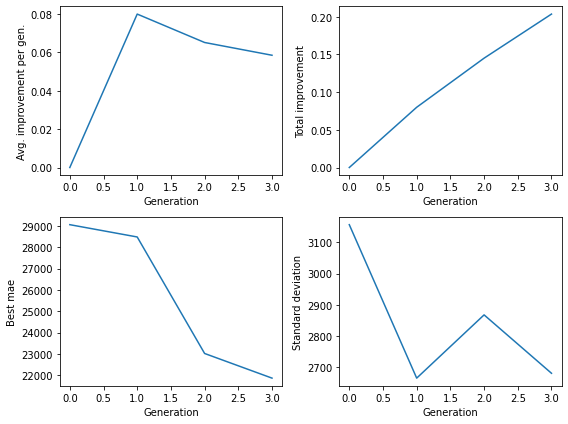

**************************************************************************************************** 
Generation 4/500
......................................................................................................................................................
Best MAE for teritory 0 is 21863.705717689103 . Average improvement is 0.01978762305054138
This generation took 0:14:43 to process.
Remaining 495 generations and approximately 110:54:17
Average improvement for generation: 0.01978762305054138 . Average total improvement: 0.22327253441402561
Total runtime: 1:05:21


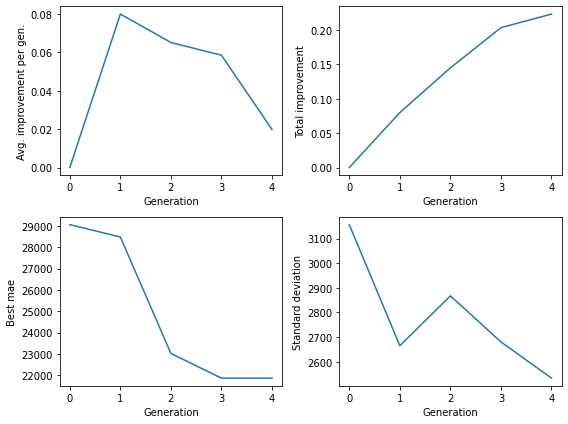

**************************************************************************************************** 
Generation 5/500
......................................................................................................................................................
Best MAE for teritory 0 is 21863.705717689103 . Average improvement is 0.0
This generation took 0:14:59 to process.
Remaining 494 generations and approximately 117:05:05
Average improvement for generation: 0.0 . Average total improvement: 0.22327253441402561
Total runtime: 1:20:20


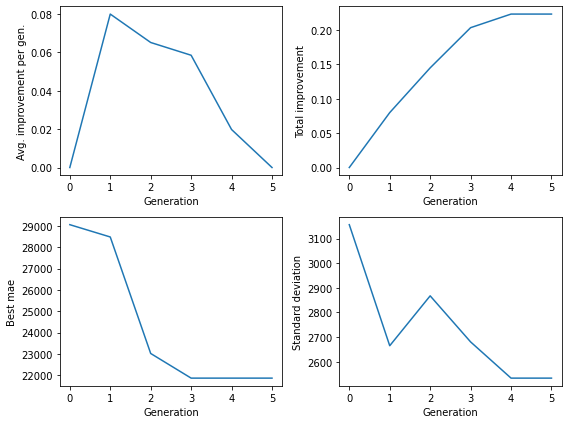

**************************************************************************************************** 
Generation 6/500
......................................................................................................................................................
Best MAE for teritory 0 is 21863.705717689103 . Average improvement is 0.025586719295281668
This generation took 0:14:52 to process.
Remaining 493 generations and approximately 119:32:02
Average improvement for generation: 0.025586719295281668 . Average total improvement: 0.24885925370930728
Total runtime: 1:35:13


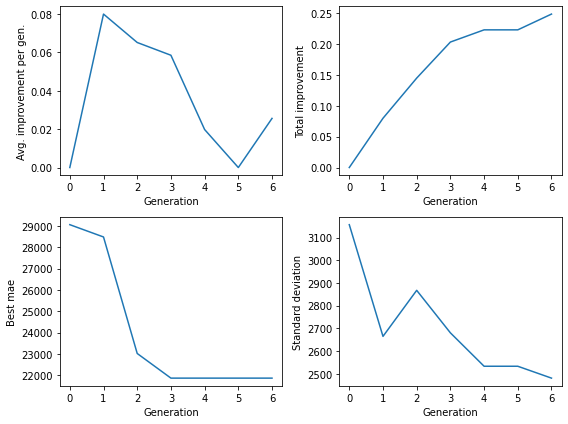

**************************************************************************************************** 
Generation 7/500
......................................................................................................................................................
Best MAE for teritory 0 is 21253.09434312593 . Average improvement is 0.04007672615209312
This generation took 0:12:50 to process.
Remaining 492 generations and approximately 112:15:49
Average improvement for generation: 0.04007672615209312 . Average total improvement: 0.2889359798614004
Total runtime: 1:48:03


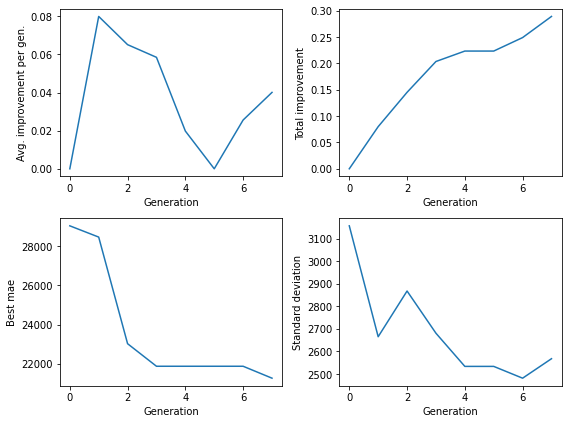

**************************************************************************************************** 
Generation 8/500
......................................................................................................................................................
Best MAE for teritory 0 is 21253.09434312593 . Average improvement is 0.0
This generation took 0:12:10 to process.
Remaining 491 generations and approximately 105:50:53
Average improvement for generation: 0.0 . Average total improvement: 0.2889359798614004
Total runtime: 2:00:14


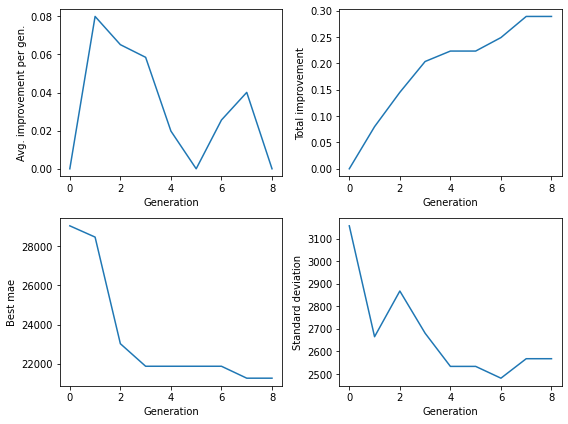

**************************************************************************************************** 
Generation 9/500
......................................................................................................................................................
Best MAE for teritory 0 is 21253.09434312593 . Average improvement is 0.004150508461555846
This generation took 0:17:32 to process.
Remaining 490 generations and approximately 124:28:13
Average improvement for generation: 0.004150508461555846 . Average total improvement: 0.29308648832295625
Total runtime: 2:17:47


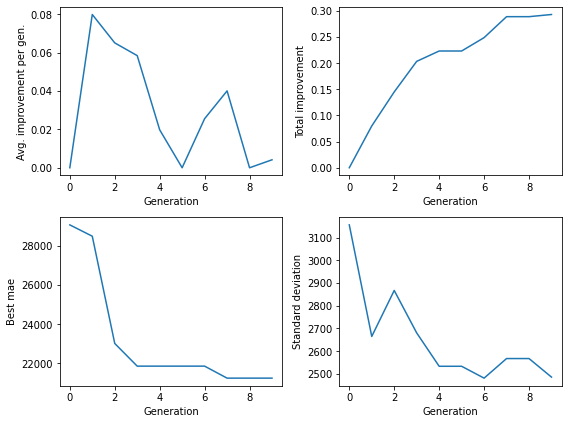

**************************************************************************************************** 
Generation 10/500
......................................................................................................................................................
Best MAE for teritory 0 is 21253.09434312593 . Average improvement is 0.0
This generation took 0:16:09 to process.
Remaining 489 generations and approximately 127:58:00
Average improvement for generation: 0.0 . Average total improvement: 0.29308648832295625
Total runtime: 2:33:56


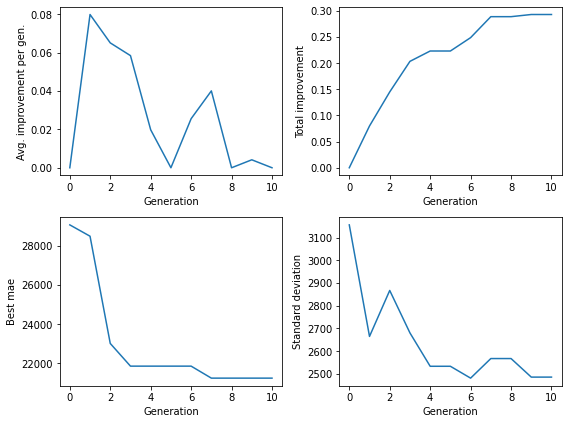

**************************************************************************************************** 
Generation 11/500
......................................................................................................................................................
Best MAE for teritory 0 is 21253.09434312593 . Average improvement is 0.021312794102236632
This generation took 0:13:27 to process.
Remaining 488 generations and approximately 118:33:33
Average improvement for generation: 0.021312794102236632 . Average total improvement: 0.3143992824251929
Total runtime: 2:47:23


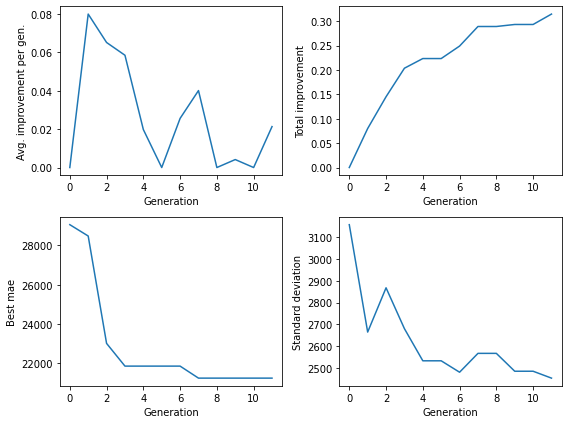

**************************************************************************************************** 
Generation 12/500
......................................................................................................................................................
Best MAE for teritory 0 is 21253.09434312593 . Average improvement is 0.007282759487442725
This generation took 0:12:30 to process.
Remaining 487 generations and approximately 109:54:58
Average improvement for generation: 0.007282759487442725 . Average total improvement: 0.3216820419126356
Total runtime: 2:59:54


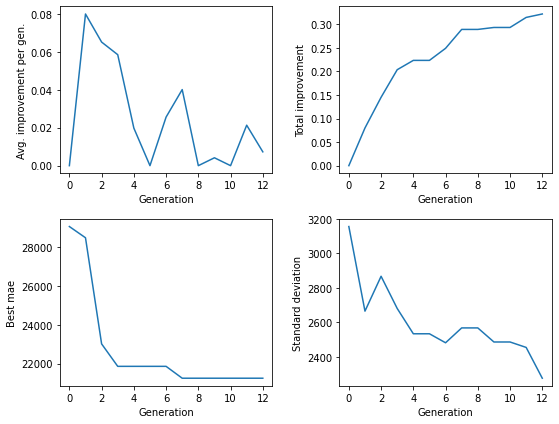

**************************************************************************************************** 
Generation 13/500
......................................................................................................................................................
Best MAE for teritory 0 is 21253.09434312593 . Average improvement is 0.01957025646439048
This generation took 0:15:01 to process.
Remaining 486 generations and approximately 115:41:53
Average improvement for generation: 0.01957025646439048 . Average total improvement: 0.3412522983770261
Total runtime: 3:14:55


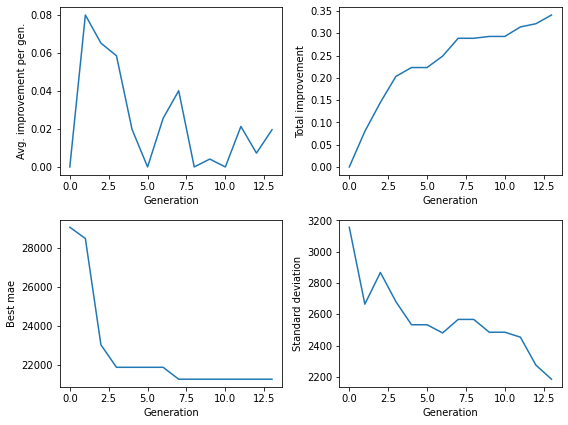

**************************************************************************************************** 
Generation 14/500
......................................................................................................................................................
Best MAE for teritory 0 is 21253.09434312593 . Average improvement is 0.0011247753833063534
This generation took 0:16:21 to process.
Remaining 485 generations and approximately 123:48:55
Average improvement for generation: 0.0011247753833063534 . Average total improvement: 0.34237707376033244
Total runtime: 3:31:16


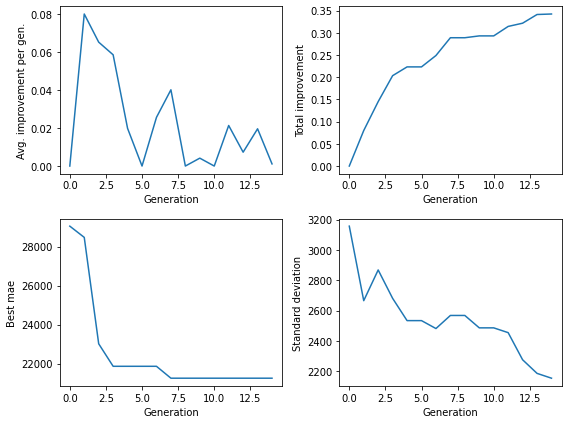

**************************************************************************************************** 
Generation 15/500
......................................................................................................................................................
Best MAE for teritory 0 is 21253.09434312593 . Average improvement is 0.010365398379748036
This generation took 0:11:16 to process.
Remaining 484 generations and approximately 107:14:10
Average improvement for generation: 0.010365398379748036 . Average total improvement: 0.3527424721400805
Total runtime: 3:42:33


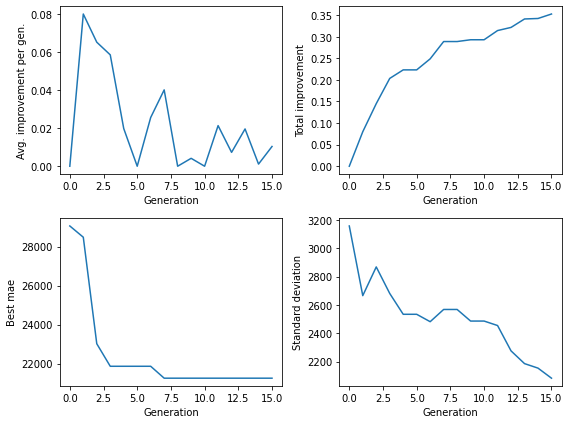

**************************************************************************************************** 
Generation 16/500
......................................................................................................................................................
Best MAE for teritory 0 is 21253.09434312593 . Average improvement is 0.0
This generation took 0:12:24 to process.
Remaining 483 generations and approximately 103:28:09
Average improvement for generation: 0.0 . Average total improvement: 0.3527424721400805
Total runtime: 3:54:57


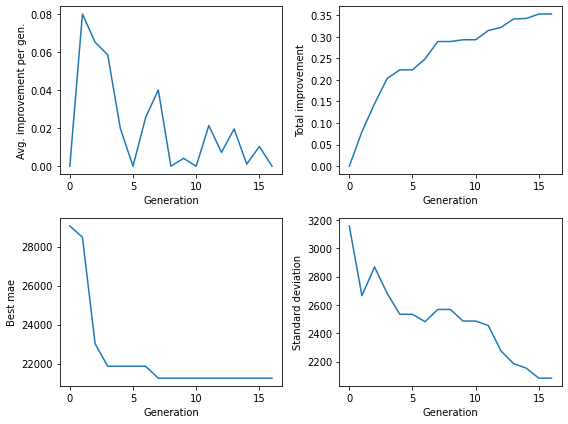

**************************************************************************************************** 
Generation 17/500
......................................................................................................................................................
Best MAE for teritory 0 is 21253.09434312593 . Average improvement is 0.004210602968257593
This generation took 0:12:11 to process.
Remaining 482 generations and approximately 100:35:04
Average improvement for generation: 0.004210602968257593 . Average total improvement: 0.35695307510833807
Total runtime: 4:07:09


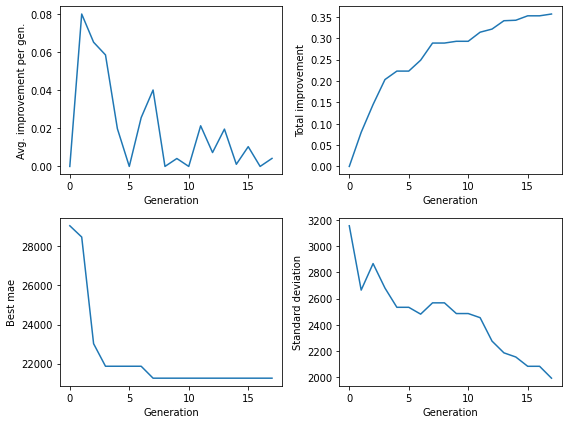

**************************************************************************************************** 
Generation 18/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.022980576908155914
This generation took 0:14:25 to process.
Remaining 481 generations and approximately 107:59:09
Average improvement for generation: 0.022980576908155914 . Average total improvement: 0.379933652016494
Total runtime: 4:21:34


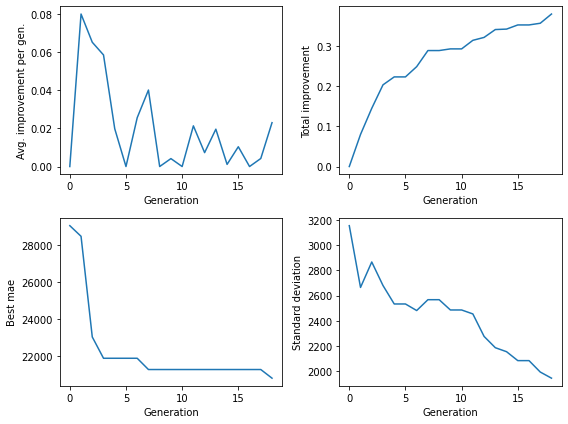

**************************************************************************************************** 
Generation 19/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.010701835393269299
This generation took 0:11:03 to process.
Remaining 480 generations and approximately 98:06:20
Average improvement for generation: 0.010701835393269299 . Average total improvement: 0.3906354874097633
Total runtime: 4:32:37


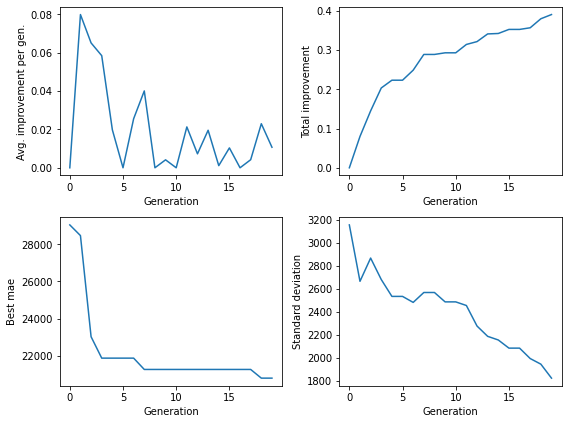

**************************************************************************************************** 
Generation 20/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.00814435845469097
This generation took 0:27:11 to process.
Remaining 479 generations and approximately 157:28:48
Average improvement for generation: 0.00814435845469097 . Average total improvement: 0.39877984586445425
Total runtime: 4:59:49


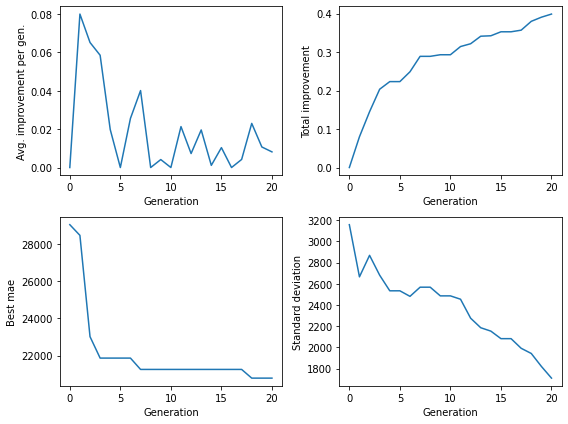

**************************************************************************************************** 
Generation 21/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0
This generation took 0:12:52 to process.
Remaining 478 generations and approximately 129:51:12
Average improvement for generation: 0.0 . Average total improvement: 0.39877984586445425
Total runtime: 5:12:41


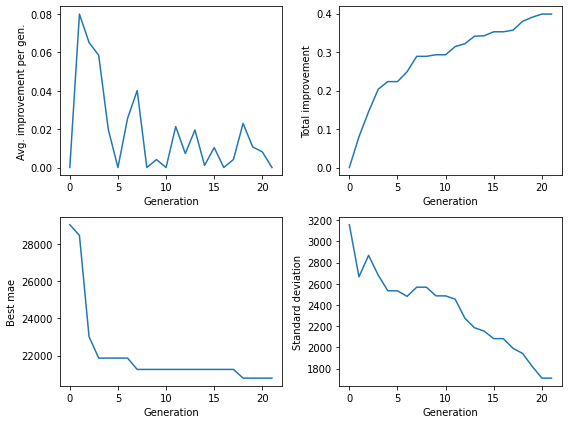

**************************************************************************************************** 
Generation 22/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0001309842782097892
This generation took 0:14:59 to process.
Remaining 477 generations and approximately 124:23:15
Average improvement for generation: 0.0001309842782097892 . Average total improvement: 0.39891083014266404
Total runtime: 5:27:41


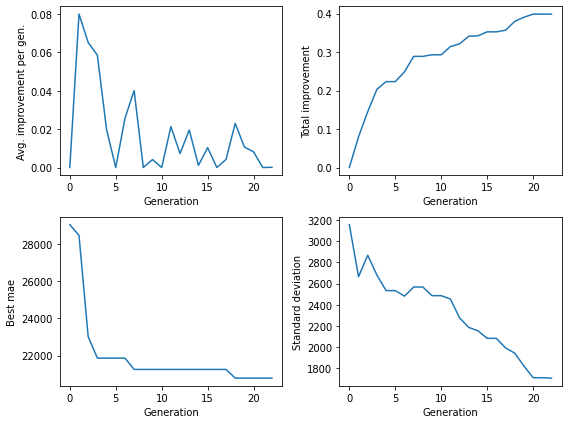

**************************************************************************************************** 
Generation 23/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.006820883432776981
This generation took 0:17:21 to process.
Remaining 476 generations and approximately 130:55:19
Average improvement for generation: 0.006820883432776981 . Average total improvement: 0.405731713575441
Total runtime: 5:45:02


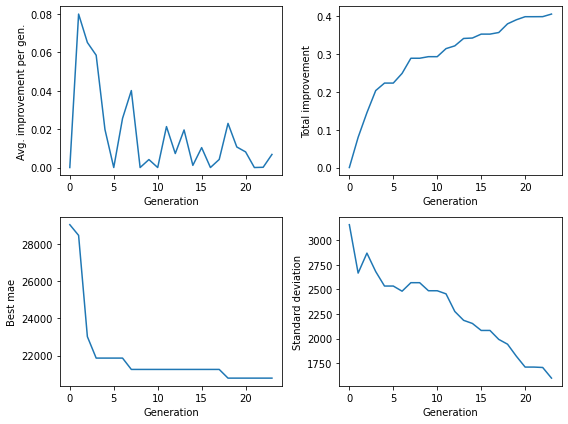

**************************************************************************************************** 
Generation 24/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0032018881750488504
This generation took 0:13:22 to process.
Remaining 475 generations and approximately 118:14:04
Average improvement for generation: 0.0032018881750488504 . Average total improvement: 0.4089336017504899
Total runtime: 5:58:24


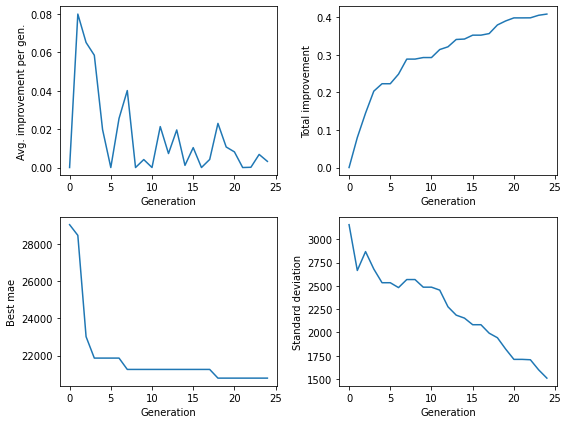

**************************************************************************************************** 
Generation 25/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.014309777817347769
This generation took 0:16:21 to process.
Remaining 474 generations and approximately 123:35:31
Average improvement for generation: 0.014309777817347769 . Average total improvement: 0.42324337956783764
Total runtime: 6:14:45


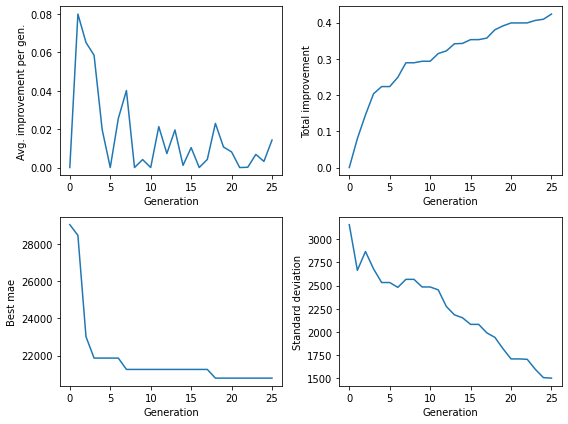

**************************************************************************************************** 
Generation 26/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.02134280358015639
This generation took 0:16:01 to process.
Remaining 473 generations and approximately 124:51:00
Average improvement for generation: 0.02134280358015639 . Average total improvement: 0.44458618314799403
Total runtime: 6:30:47


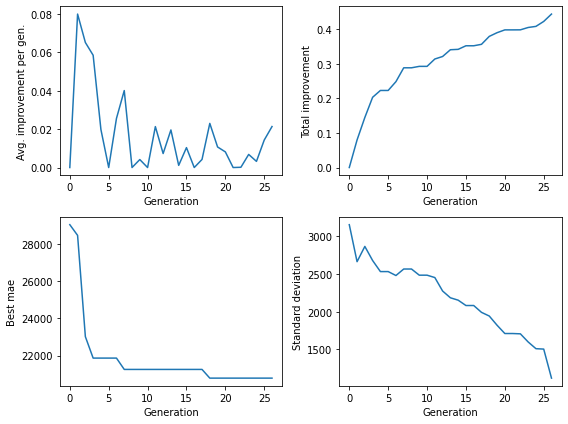

**************************************************************************************************** 
Generation 27/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0
This generation took 0:16:53 to process.
Remaining 472 generations and approximately 128:43:39
Average improvement for generation: 0.0 . Average total improvement: 0.44458618314799403
Total runtime: 6:47:41


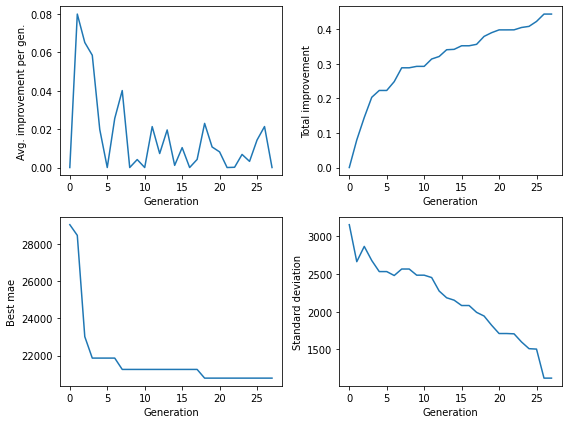

**************************************************************************************************** 
Generation 28/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0
This generation took 0:19:30 to process.
Remaining 471 generations and approximately 140:49:14
Average improvement for generation: 0.0 . Average total improvement: 0.44458618314799403
Total runtime: 7:07:11


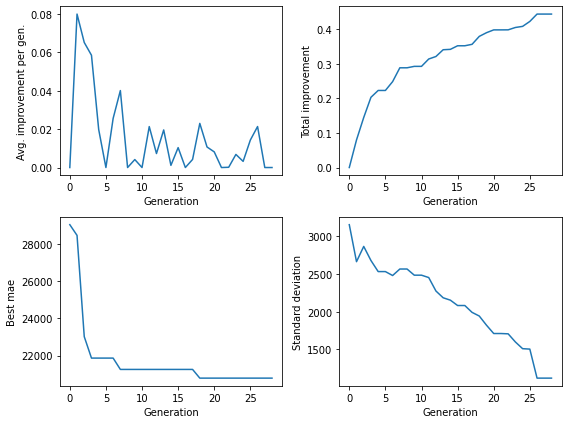

**************************************************************************************************** 
Generation 29/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0
This generation took 0:16:22 to process.
Remaining 470 generations and approximately 134:23:03
Average improvement for generation: 0.0 . Average total improvement: 0.44458618314799403
Total runtime: 7:23:34


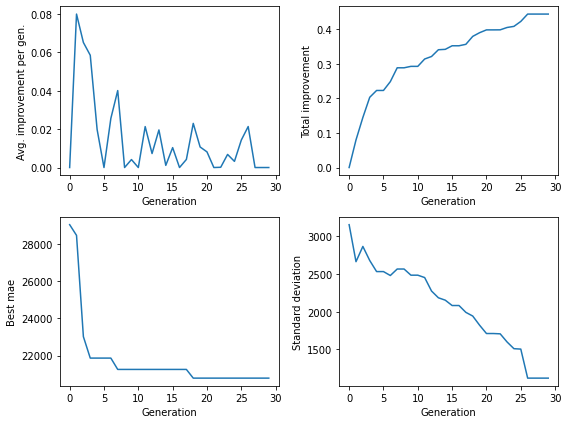

**************************************************************************************************** 
Generation 30/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.002678687546753933
This generation took 0:12:18 to process.
Remaining 469 generations and approximately 115:08:50
Average improvement for generation: 0.002678687546753933 . Average total improvement: 0.44726487069474796
Total runtime: 7:35:52


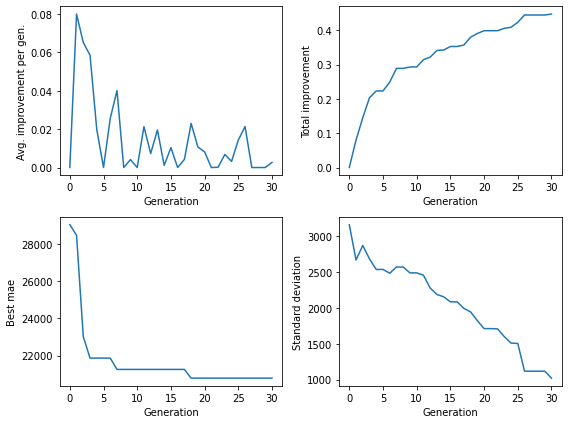

**************************************************************************************************** 
Generation 31/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0017157609413538388
This generation took 0:15:24 to process.
Remaining 468 generations and approximately 117:32:54
Average improvement for generation: 0.0017157609413538388 . Average total improvement: 0.4489806316361018
Total runtime: 7:51:17


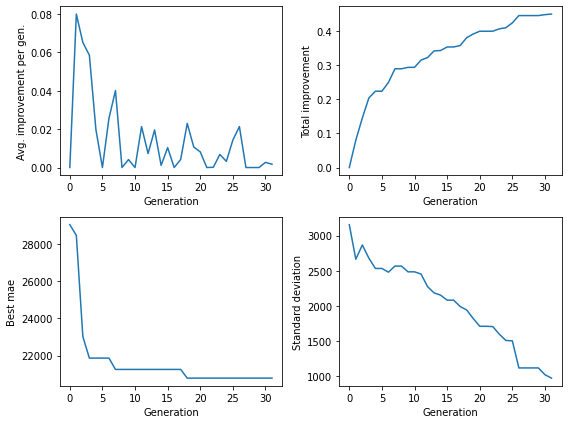

**************************************************************************************************** 
Generation 32/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0
This generation took 0:20:37 to process.
Remaining 467 generations and approximately 138:56:12
Average improvement for generation: 0.0 . Average total improvement: 0.4489806316361018
Total runtime: 8:11:55


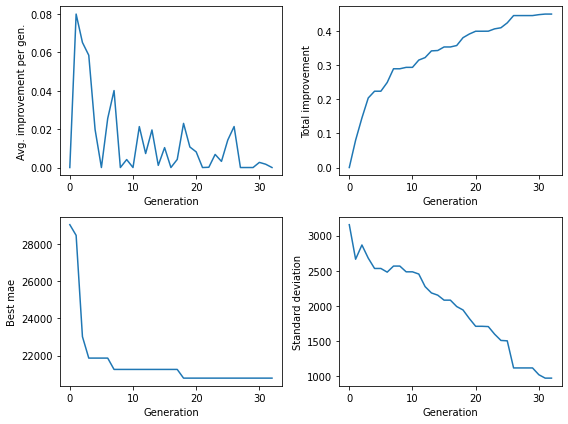

**************************************************************************************************** 
Generation 33/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0
This generation took 0:18:44 to process.
Remaining 466 generations and approximately 142:06:10
Average improvement for generation: 0.0 . Average total improvement: 0.4489806316361018
Total runtime: 8:30:39


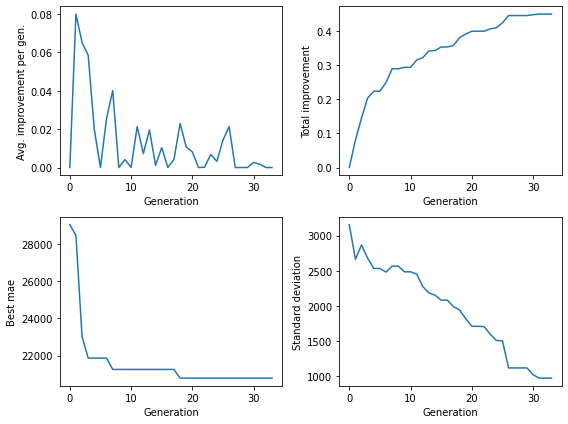

**************************************************************************************************** 
Generation 34/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0
This generation took 0:13:10 to process.
Remaining 465 generations and approximately 121:58:07
Average improvement for generation: 0.0 . Average total improvement: 0.4489806316361018
Total runtime: 8:43:50


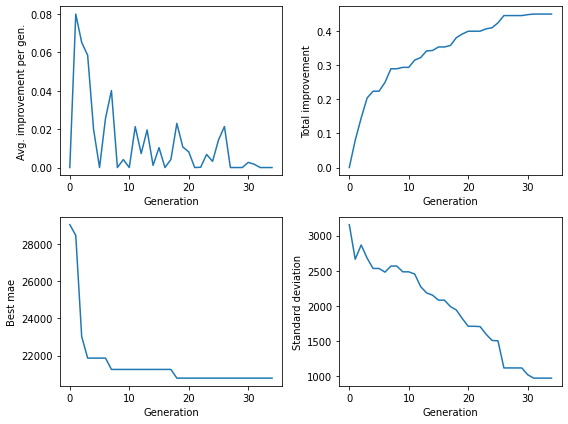

**************************************************************************************************** 
Generation 35/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0067944612435557605
This generation took 0:15:34 to process.
Remaining 464 generations and approximately 121:04:55
Average improvement for generation: 0.0067944612435557605 . Average total improvement: 0.45577509287965756
Total runtime: 8:59:24


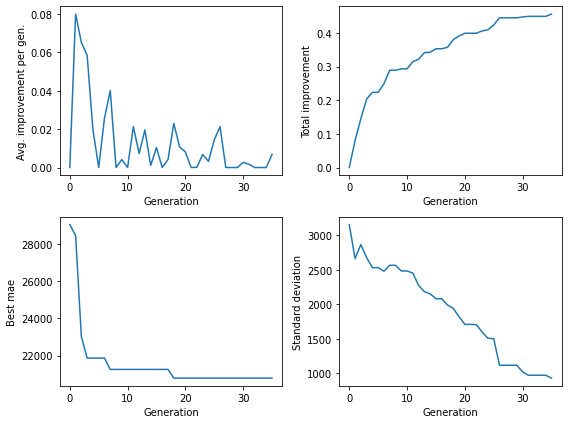

**************************************************************************************************** 
Generation 36/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0
This generation took 0:19:41 to process.
Remaining 463 generations and approximately 136:23:39
Average improvement for generation: 0.0 . Average total improvement: 0.45577509287965756
Total runtime: 9:19:06


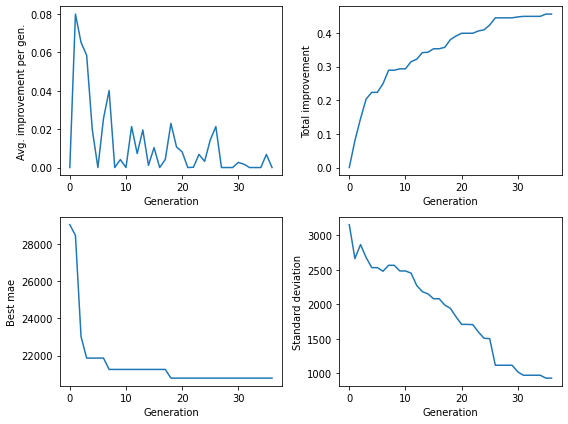

**************************************************************************************************** 
Generation 37/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.012505280820951148
This generation took 0:21:38 to process.
Remaining 462 generations and approximately 151:23:49
Average improvement for generation: 0.012505280820951148 . Average total improvement: 0.4682803737006087
Total runtime: 9:40:45


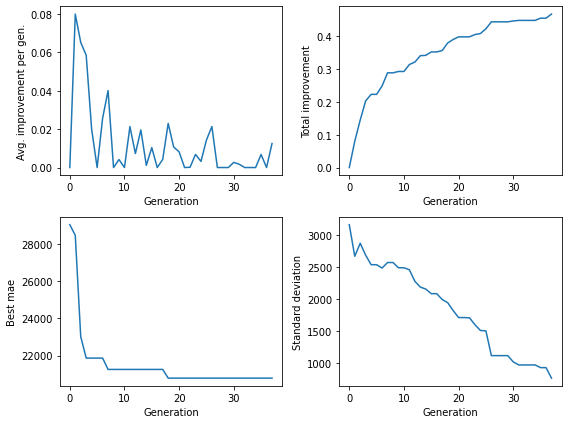

**************************************************************************************************** 
Generation 38/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0
This generation took 0:21:40 to process.
Remaining 461 generations and approximately 158:49:13
Average improvement for generation: 0.0 . Average total improvement: 0.4682803737006087
Total runtime: 10:02:26


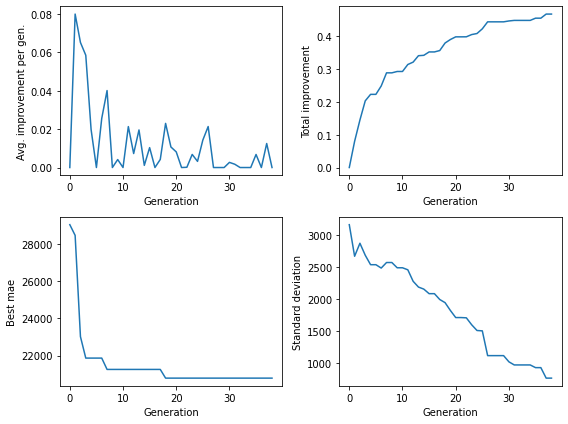

**************************************************************************************************** 
Generation 39/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.00467695338550822
This generation took 0:16:23 to process.
Remaining 460 generations and approximately 142:05:04
Average improvement for generation: 0.00467695338550822 . Average total improvement: 0.47295732708611693
Total runtime: 10:18:49


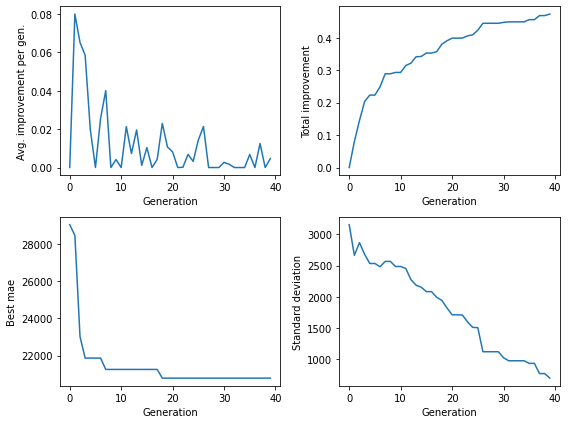

**************************************************************************************************** 
Generation 40/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0
This generation took 0:20:20 to process.
Remaining 459 generations and approximately 148:41:36
Average improvement for generation: 0.0 . Average total improvement: 0.47295732708611693
Total runtime: 10:39:10


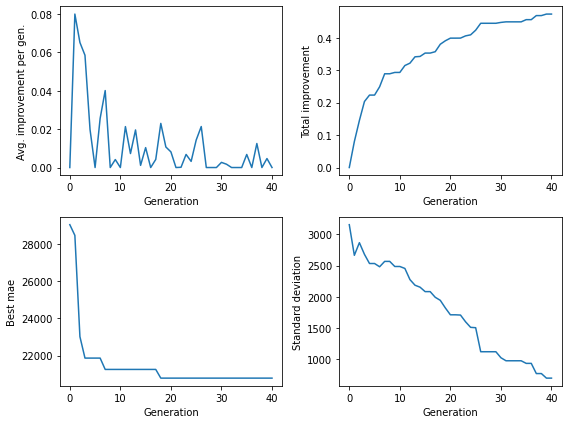

**************************************************************************************************** 
Generation 41/500
......................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0
This generation took 0:17:10 to process.
Remaining 458 generations and approximately 139:42:53
Average improvement for generation: 0.0 . Average total improvement: 0.47295732708611693
Total runtime: 10:56:20


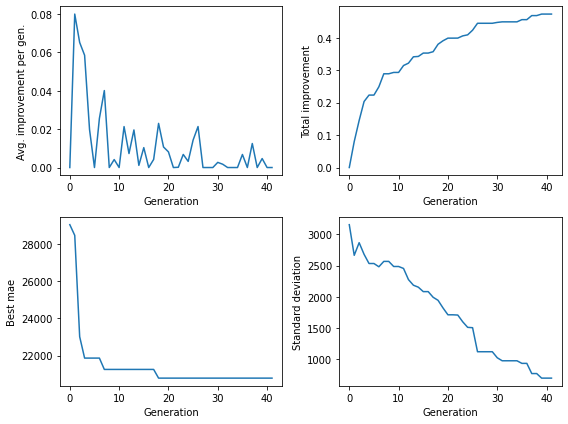

**************************************************************************************************** 
Generation 42/500
.....................................................................................................................................................
Best MAE for teritory 0 is 20784.215890410964 . Average improvement is 0.0026105086380932008
This generation took 0:16:28 to process.
Remaining 457 generations and approximately 132:27:19
Average improvement for generation: 0.0026105086380932008 . Average total improvement: 0.47556783572421013
Total runtime: 11:12:49


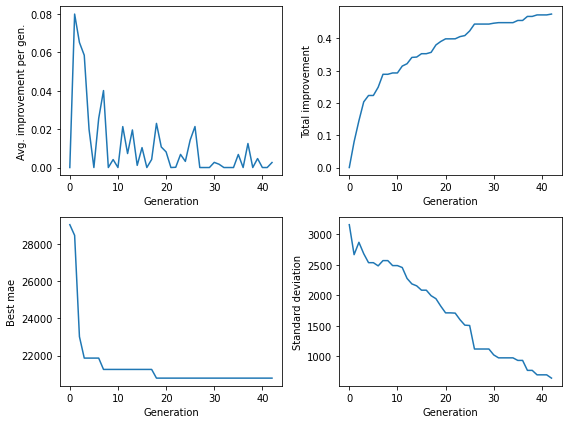

**************************************************************************************************** 
Generation 43/500
......................................................................................................................................

In [ ]:
# Hyper parameter tuning (using a genetic algorithm)

n_features = X_train_prepped.shape[1]
n_samples = X_train_prepped.shape[0]
pop_size = 150
n_generations = 500
n_territories = 1
n_survivors = 15
drift_threshold = 0.0
CONST_SMALL_STEP_NUTATION_SD_FACTOR = 0.01
CONST_LARGE_STEP_MUTATION_RATE = 0.1
small_step_mutation_sd_factor = CONST_SMALL_STEP_NUTATION_SD_FACTOR
large_step_mutation_rate = CONST_LARGE_STEP_MUTATION_RATE

param_limits = {
    'n_estimators':             (1, 1000),
    'max_depth':                (1, n_features),
    'min_samples_split':        (2, 1000),
    'min_samples_leaf':         (1, 1000),
    'min_weight_fraction_leaf': (0, 0.5),
    'max_features':             (1, n_features),
    'max_leaf_nodes':           (2, 10000),
    'min_impurity_decrease':    (0, 1),
    'bootstrap':                (True, False),
    'oob_score':                (True, False),
    'ccp_alpha':                (0, 1),
    'max_samples':              (1, n_samples),
}

"""
Format of ecosystem is:
{
  'last_generation': int,
  'times': [float,...],
  'improvements': [float,...],
  'average_total_improve': [float,...],
  'runtime_running_avg': float,
  'total_runtime': float,
  'need_drift': [False,...],
  'drifted_last_generation': [False,...],
  'best_mae_changes': [(float, int),...],
  'best_mae': [float,...],
  'std': [float,...],
  'avg_mae_survivors': [{
    'generation': int,
    'values': [None] * n_territories,
  }],
  'territories': [
    [{hp:{}, mae=None},...],
    .
    .
    .
  ]
}
"""
ecosystem = {
    'last_generation': 0,
    'times': [],
    'improvements': [],
    'average_total_improve': [],
    'runtime_running_avg': 0,
    'total_runtime': 0,
    'need_drift': [False] * n_territories,
    'drifted_last_generation': [False] * n_territories,
    'best_mae_changes': [],
    'best_mae': [],
    'std': [],
    'avg_mae_survivors': [],
    'territories': []
}


def init_env(ecosystem):
  territories = []
  for i in range(n_territories):
    territories.append([])
  ecosystem['territories'] = territories


def init_HP():
  """
  Provides a randomly initialized set of hyper parameters for a RandomForestRegressor
  """

  global n_features, n_samples, param_limits

  HP = {
      'n_estimators': int(random.randint(*param_limits['n_estimators'])),
      'max_depth': int(random.randint(*param_limits['max_depth'])),
      'min_samples_split': int(random.randint(*param_limits['min_samples_split'])),
      'min_samples_leaf': int(random.randint(*param_limits['min_samples_leaf'])),
      'min_weight_fraction_leaf': random.uniform(*param_limits['min_weight_fraction_leaf']),
      'max_features': int(random.randint(*param_limits['max_features'])),
      'max_leaf_nodes': int(random.randint(*param_limits['max_leaf_nodes'])),
      'min_impurity_decrease': random.uniform(*param_limits['min_impurity_decrease']),
      'bootstrap': bool(random.choice((True, False))),
      'oob_score': False,
      'ccp_alpha': random.uniform(*param_limits['ccp_alpha']),
      'max_samples': int(random.randint(*param_limits['max_samples'])),
  }

  if HP['bootstrap'] == True:
    HP['oob_score'] = bool(random.choice((True, False)))
  
  return HP


def evaluate_model(model, X_train, X_cv, y_train, y_cv):
  model.fit(X_train_prepped, y_train)
  pred = model.predict(X_cv_prepped)
  return mean_absolute_error(pred, y_cv)


def compute_sd(limits):
  return (limits[1] - limits[0]) * small_step_mutation_sd_factor


def small_step_mutation(zygote):
  zygote['n_estimators'] = max(1, zygote['n_estimators'] + int(np.random.normal(0, compute_sd(param_limits['n_estimators']))))
  zygote['max_depth'] = min(max(1, zygote['max_depth'] + int(np.random.normal(0, int(compute_sd(param_limits['max_depth']))))), n_features)
  zygote['min_samples_split'] = max(2, zygote['min_samples_split'] + int(np.random.normal(0, compute_sd(param_limits['min_samples_split']))))
  zygote['min_samples_leaf'] = max(1, zygote['min_samples_leaf'] + int(np.random.normal(0, compute_sd(param_limits['min_samples_leaf']))))
  zygote['min_weight_fraction_leaf'] = min(max(0, zygote['min_weight_fraction_leaf'] + np.random.normal(0, compute_sd(param_limits['min_weight_fraction_leaf']))), 0.5)
  zygote['max_features'] = min(max(1, zygote['max_features'] + int(np.random.normal(0, int(compute_sd(param_limits['max_features']))))), n_features)
  zygote['max_leaf_nodes'] = max(2, zygote['max_leaf_nodes'] + int(np.random.normal(0, compute_sd(param_limits['max_leaf_nodes']))))
  zygote['min_impurity_decrease'] += max(0, np.random.normal(0, compute_sd(param_limits['min_impurity_decrease'])))
  zygote['bootstrap'] = bool(np.random.choice([True, False], p=[1 - small_step_mutation_sd_factor if x==zygote['bootstrap'] else small_step_mutation_sd_factor for x in [True, False]]))
  zygote['oob_score'] = bool(np.random.choice([True, False], p=[1 - small_step_mutation_sd_factor if x==zygote['oob_score'] else small_step_mutation_sd_factor for x in [True, False]]))
  zygote['ccp_alpha'] = max(0, zygote['ccp_alpha'] + int(np.random.normal(0, compute_sd(param_limits['ccp_alpha']))))
  zygote['max_samples'] = min(max(1, zygote['max_samples'] + int(np.random.normal(0, compute_sd(param_limits['max_samples'])))), n_samples)

  if zygote['bootstrap'] == False:
    zygote['oob_score'] = False
  
  return zygote


def should_do_large_step():
  return np.random.choice([True, False], p=[1 - large_step_mutation_rate, large_step_mutation_rate])


def large_step_mutation(zygote):
  global param_limits

  if should_do_large_step():
    zygote['n_estimators'] = int(random.randint(*param_limits['n_estimators']))
  if should_do_large_step():
    zygote['max_depth'] = int(random.randint(*param_limits['max_depth']))
  if should_do_large_step():
    zygote['min_samples_split'] = int(random.randint(*param_limits['min_samples_split']))
  if should_do_large_step():
    zygote['min_samples_leaf'] = int(random.randint(*param_limits['min_samples_leaf']))
  if should_do_large_step():
    zygote['min_weight_fraction_leaf'] = random.uniform(*param_limits['min_weight_fraction_leaf'])
  if should_do_large_step():
    zygote['max_features'] = int(random.randint(*param_limits['max_features']))
  if should_do_large_step():
    zygote['max_leaf_nodes'] = int(random.randint(*param_limits['max_leaf_nodes']))
  if should_do_large_step():
    zygote['min_impurity_decrease'] = random.uniform(*param_limits['min_impurity_decrease'])
  if should_do_large_step():
    zygote['bootstrap'] = bool(random.choice((True, False)))
  if should_do_large_step():
    zygote['oob_score'] = bool(random.choice((True, False)))
  if should_do_large_step():
    zygote['ccp_alpha'] = random.uniform(*param_limits['ccp_alpha'])
  if should_do_large_step():
    zygote['max_samples'] = int(random.randint(*param_limits['max_samples']))

  if zygote['bootstrap'] == False:
    zygote['oob_score'] = False
  
  return zygote


def mutate(zygote):
  zygote = small_step_mutation(zygote)
  zygote = large_step_mutation(zygote)
  return zygote


def fertilize(male, female):
  parents = [male, female]

  return mutate({
      'n_estimators': random.choice(parents)['hp']['n_estimators'],
      'max_depth': random.choice(parents)['hp']['max_depth'],
      'min_samples_split': random.choice(parents)['hp']['min_samples_split'],
      'min_samples_leaf': random.choice(parents)['hp']['min_samples_leaf'],
      'min_weight_fraction_leaf': random.choice(parents)['hp']['min_weight_fraction_leaf'],
      'max_features': random.choice(parents)['hp']['max_features'],
      'max_leaf_nodes': random.choice(parents)['hp']['max_leaf_nodes'],
      'min_impurity_decrease': random.choice(parents)['hp']['min_impurity_decrease'],
      'bootstrap': random.choice(parents)['hp']['bootstrap'],
      'oob_score': random.choice(parents)['hp']['oob_score'],
      'ccp_alpha': random.choice(parents)['hp']['ccp_alpha'],
      'max_samples': random.choice(parents)['hp']['max_samples'],
  })


def breed(population):
  while len(population) < pop_size:
    for survivor in population[1:n_survivors]:
      population.append({'hp': fertilize(population[0], survivor), 'mae': None})
      if len(population) >= pop_size:
        break


def perform_drift(territories, idx):
  territory = territories[idx]
  other_territories = [(i, x) for (i, x) in enumerate(territories) if x is not territory]
  random.shuffle(other_territories)
  for i, other_ter in other_territories:
    if other_ter[1]['mae'] < territory[0]['mae']:
      other_ind = other_ter[1]
      territory[0] = other_ind
      other_ter.pop(1)
      print("Drift from ter.", i, "to ter.", idx)
      break


class Survivor:
  def __init__(self, hp, mae):
    self.hp = hp
    self.mae = mae
  
  def __lt__(self, other):
    return self.mae < other.mae
  
  def to_dict(self):
    return {'hp': self.hp, 'mae': self.mae}


def seconds2timestr(seconds): 
  hour = seconds // 3600
  seconds %= 3600
  minutes = seconds // 60
  seconds %= 60
  
  return "%d:%02d:%02d" % (hour, minutes, seconds)


def process_specimen(population, idx):
  global preped_X_train, preped_X_cv, y_train, y_cv
  if population[idx]['mae'] is None:
    model = model_from_hp(population[idx]['hp'])
    population[idx]['mae'] = evaluate_model(model, X_train_prepped, X_cv_prepped, y_train, y_cv)
  return population[idx]


def process_teritory(ecosystem, idx, executor):
    territories = ecosystem['territories']
    futures = [executor.submit(process_specimen, territories[idx], i) for i in range(len(territories[idx]))]
    survivors = []
    for future in concurrent.futures.as_completed(futures):
        heapq.heappush(survivors, Survivor(**future.result()))
        print('.', end='')
    survivors = heapq.nsmallest(n_survivors, survivors)
    new_avg_mae_survivors = np.mean([x.mae for x in survivors])
    try:
      improvement = ecosystem['avg_mae_survivors'][-2]['values'][idx] / new_avg_mae_survivors - 1
      if n_territories > 1 and improvement <= drift_threshold:
        ecosystem['need_drift'][idx] = True
    except Exception as ex:
      improvement = 0
    ecosystem['avg_mae_survivors'][-1]['values'][idx] = new_avg_mae_survivors
    print("\nBest MAE for territory", idx, "is", survivors[0].mae, ". Average improvement is", improvement)
    territories[idx] = [x.to_dict() for x in survivors]
    return improvement


try:
  with open(os.path.join(project_files_path, 'ecosystem.json')) as f:
    ecosystem = json.load(f)
    generations_passed = ecosystem['last_generation'] + 1
except Exception as e:
  for i in range(n_territories):
    ecosystem['territories'].append([{'hp': init_HP(), 'mae': None} for i in range(int(pop_size))])
  generations_passed = 0

# Supress warnings to avoid terminal clutter
logging.captureWarnings(True)


with concurrent.futures.ThreadPoolExecutor() as executor:
  for generation in range(generations_passed, n_generations):
    print("*" * 100, "\nGeneration", str(generation) + '/' + str(n_generations))
    start_time = time.time()
    ecosystem['avg_mae_survivors'].append({'generation': generation, 'values':[0] * n_territories})
    improvements = []
    futures = [executor.submit(process_teritory, ecosystem, idx, executor) for idx in range(len(ecosystem['territories']))]
    for future in concurrent.futures.as_completed(futures):
      improvements.append(future.result())
    average_improve = float(np.mean(improvements))
    try:
      ecosystem['average_total_improve'].append(ecosystem['average_total_improve'][-1] + average_improve)
    except:
      ecosystem['average_total_improve'].append(average_improve)
    ecosystem['improvements'].append(average_improve)

    # Get best mae
    best_mae = ecosystem['territories'][0][0]['mae']
    ter = None
    for i, territory in enumerate(ecosystem['territories']):
      if territory[0]['mae'] < best_mae:
        best_mae = territory[0]['mae']
        ter = i
    
    ecosystem['best_mae'].append(best_mae)
    if len(ecosystem['best_mae_changes']) == 0 or best_mae < ecosystem['best_mae_changes'][-1][0]:
      ecosystem['best_mae_changes'].append((best_mae, ter))
    # End get best mae

    # Drifts
    if n_territories > 1:
      for i in range(len(ecosystem['need_drift'])):
        if ecosystem['need_drift'][i] and not ecosystem['drifted_last_generation'][i]:
          perform_drift(ecosystem['territories'], i)
          ecosystem['drifted_last_generation'][i] = True
        elif ecosystem['drifted_last_generation'][i] == True:
          ecosystem['drifted_last_generation'][i] = False
      sum_drifts = np.sum(ecosystem['need_drift'])
      small_step_mutation_sd_factor = CONST_SMALL_STEP_NUTATION_SD_FACTOR * (sum_drifts + 1)
      large_step_mutation_rate = CONST_LARGE_STEP_MUTATION_RATE * (sum_drifts + 1)
    # End drifts

    # Bread
    futures = [executor.submit(breed, ecosystem['territories'][i]) for i in range(n_territories)]
    for future in concurrent.futures.as_completed(futures):
      future.result() # just make sure all breedings are done before continuing
    # End breeding

    # Compute standard deviation of all individuals
    mae_vals = []
    for territory in ecosystem['territories']:
      for individual in territory:
        if individual['mae'] is not None:
          mae_vals.append(individual['mae'])
    ecosystem['std'].append(np.std(mae_vals))
    # End compute standard deviation

    ecosystem['last_generation'] = generation
    end_time = time.time()
    generation_process_time = end_time - start_time
    ecosystem['total_runtime'] += generation_process_time
    ecosystem['runtime_running_avg'] = (ecosystem['runtime_running_avg'] + generation_process_time) / 2
    ecosystem['times'].append(generation_process_time)
    with open(os.path.join(project_files_path, 'ecosystem.json'), 'w') as f:
      json.dump(ecosystem, f)
    remaining_generations = n_generations - generation - 1
    print("This generation took", seconds2timestr(generation_process_time), "to process.")
    print("Remaining", remaining_generations, "generations and approximately", seconds2timestr(ecosystem['runtime_running_avg'] * remaining_generations))
    print("Average improvement for generation:", average_improve, ". Average total improvement:", ecosystem['average_total_improve'][-1])
    print("Total runtime:", seconds2timestr(ecosystem['total_runtime']))
    
    plt.figure(figsize=(8, 6))

    plt.subplot(2, 2, 1)
    plt.plot(ecosystem['improvements'])
    plt.xlabel("Generation")
    plt.ylabel("Avg. improvement per gen.")

    plt.subplot(2, 2, 2)
    plt.plot(ecosystem['average_total_improve'])
    plt.xlabel("Generation")
    plt.ylabel("Total improvement")

    plt.subplot(2, 2, 3)
    plt.plot(ecosystem['best_mae'])
    plt.xlabel("Generation")
    plt.ylabel("Best mae")

    plt.subplot(2, 2, 4)
    plt.plot(ecosystem['std'])
    plt.xlabel("Generation")
    plt.ylabel("Standard deviation")

    plt.tight_layout()
    plt.show()
    

In [ ]:
# Prepeare test predictions
with open(os.path.join(project_files_path, 'ecosystem.json')) as f:
    ecosystem = json.load(f)

X_train_cv = pd.concat([preped_X_train, preped_X_cv], axis=0)
y_train_cv = pd.concat([y_train, y_cv], axis=0)

best_hp = ecosystem['teritories'][0][0]['hp']
best_mae = ecosystem['teritories'][0][0]['mae']
for teritory in ecosystem['teritories']:
  for specimen in teritory:
    if specimen['mae'] is not None and specimen['mae'] < best_mae:
      best_mae = specimen['mae']
      best_hp = specimen['hp']

print(best_hp)

model = model_from_hp(best_hp)

print("Fitting")

model.fit(X_train_cv, y_train_cv)

print("Predicting")

preds_test = model.predict(preped_X_test)

print("Saving")

output = pd.DataFrame({'Id': preped_X_test.Id.astype('int32'),
                       'SalePrice': preds_test})
output.to_csv(os.path.join(project_files_path, 'submission_gen.csv'), index=False)

In [ ]:
output = pd.DataFrame({'Id': preped_X_test.Id.astype('int32'),
                       'SalePrice': preds_test})
output.to_csv(os.path.join(project_files_path, 'submission_gen.csv'), index=False)